In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357279 sha256=5857dada9bf0504a47e545fe393fb5a714ca9b20c8316c014194d7f9b41a859f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [9]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [44]:
from surprise import Dataset, SVD, SVDpp, NMF
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin("ml-100k")

# We'll use the famous SVD algorithm.
algo_SVD = SVD(random_state=42)

# Run 5-fold cross-validation and print results
cvSVD = cross_validate(algo_SVD, data, measures=["RMSE", "MAE"], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9405  0.9333  0.9474  0.9299  0.9353  0.9373  0.0061  
MAE (testset)     0.7432  0.7348  0.7456  0.7300  0.7387  0.7385  0.0056  
Fit time          2.01    1.50    1.48    1.50    1.48    1.59    0.21    
Test time         0.32    0.12    0.36    0.13    0.15    0.22    0.10    


In [17]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs': [10, 20, 30],
    'lr_all': [0.002, 0.005, 0.008],
    'reg_all': [0.01, 0.02, 0.1]
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data)

# combination of parameters that gave the best RMSE score
bp = gs.best_params['rmse']
print(bp)

{'n_epochs': 30, 'lr_all': 0.008, 'reg_all': 0.1}


In [77]:
# We'll use the famous SVD algorithm with better parametrs.
algo_SVDgscv = SVD(
    n_epochs=bp['n_epochs'],
    lr_all=bp['lr_all'],
    reg_all=bp['reg_all'],
    random_state=42)

# Run 5-fold cross-validation and print results
cvSVDgscv = cross_validate(algo_SVDgscv, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9126  0.9125  0.9167  0.9154  0.9211  0.9156  0.0032  
MAE (testset)     0.7224  0.7234  0.7236  0.7234  0.7277  0.7241  0.0019  
Fit time          2.24    2.17    2.41    2.86    2.20    2.38    0.26    
Test time         0.13    0.13    0.20    0.40    0.13    0.20    0.11    


In [18]:
# best RMSE score
print(gs.best_score["rmse"])

results_df = pd.DataFrame.from_dict(gs.cv_results)
print(results_df)

0.9231602044335769
    split0_test_rmse  split1_test_rmse  split2_test_rmse  mean_test_rmse  std_test_rmse  rank_test_rmse  mean_fit_time  std_fit_time  mean_test_time  std_test_time                                             params  param_n_epochs  param_lr_all  param_reg_all
0           0.970620          0.968469          0.966787        0.968625       0.001569              24       0.824198      0.024189        0.387357       0.030749  {'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...              10         0.002           0.01
1           0.970135          0.967989          0.966377        0.968167       0.001540              22       0.943259      0.047517        0.505041       0.095875  {'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0...              10         0.002           0.02
2           0.969700          0.968857          0.966757        0.968438       0.001237              23       1.409872      0.219470        0.488128       0.096564  {'n_epochs': 10, 'lr_all': 0.002, 'r

In [46]:
# We'll use the SVDpp algorithm.
algo_SVDpp = SVDpp(random_state=42)

# Run 5-fold cross-validation and print results
cvSVDpp = cross_validate(algo_SVDpp, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9195  0.9136  0.9203  0.9164  0.9272  0.9194  0.0046  
MAE (testset)     0.7212  0.7170  0.7188  0.7198  0.7253  0.7204  0.0028  
Fit time          35.84   33.44   32.44   29.12   29.35   32.04   2.54    
Test time         6.09    4.97    5.04    5.56    5.13    5.36    0.42    


In [45]:
# We'll use the NMF algorithm.
algo_NMF = NMF(random_state=42)

# Run 5-fold cross-validation and print results
cvNMF = cross_validate(algo_NMF, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9625  0.9601  0.9724  0.9645  0.9567  0.9632  0.0053  
MAE (testset)     0.7578  0.7558  0.7603  0.7578  0.7551  0.7574  0.0018  
Fit time          2.66    3.08    2.83    2.47    2.32    2.67    0.27    
Test time         0.36    0.12    0.47    0.11    0.12    0.24    0.15    


In [78]:
print((cvSVD))
print((cvSVDgscv))
print((cvSVDpp))
print((cvNMF))

{'test_rmse': array([0.94047755, 0.93331775, 0.94739254, 0.92994618, 0.93526581]), 'test_mae': array([0.74320122, 0.7348375 , 0.74563727, 0.72997219, 0.7387077 ]), 'fit_time': (2.0133252143859863, 1.4968311786651611, 1.4796791076660156, 1.498258352279663, 1.4831225872039795), 'test_time': (0.32253241539001465, 0.12260222434997559, 0.3554723262786865, 0.13117337226867676, 0.14613056182861328)}
{'test_rmse': array([0.91255724, 0.91245679, 0.91674899, 0.91538132, 0.92107776]), 'test_mae': array([0.72235249, 0.72335864, 0.72355153, 0.72338455, 0.72771305]), 'fit_time': (2.2350425720214844, 2.173119068145752, 2.406658172607422, 2.8644022941589355, 2.1966819763183594), 'test_time': (0.1318826675415039, 0.12662744522094727, 0.19546008110046387, 0.4007711410522461, 0.1291828155517578)}
{'test_rmse': array([0.91954228, 0.91356838, 0.92033576, 0.91637603, 0.9271977 ]), 'test_mae': array([0.72118254, 0.71701156, 0.71879057, 0.71983727, 0.7253462 ]), 'fit_time': (35.84227252006531, 33.437491655349

In [79]:
from copy import deepcopy as cp

combine = dict(zip(
    ["SVD", "SVD&GS", "SVD++", "NMF"],
    [cp(cvSVD), cp(cvSVDgscv), cp(cvSVDpp), cp(cvNMF)]))

for cv in combine.values():
    del cv['test_time']
    del cv['fit_time']

    for metric in cv.keys():
        mean_std = {
            'mean': round(cv[metric].mean(),4),
            'std':round(cv[metric].std(),4)}
        cv[metric] = mean_std

comperate = pd.DataFrame.from_dict(combine, orient="index")
print(comperate)

                              test_rmse                         test_mae
SVD     {'mean': 0.9373, 'std': 0.0061}  {'mean': 0.7385, 'std': 0.0056}
SVD&GS  {'mean': 0.9156, 'std': 0.0032}  {'mean': 0.7241, 'std': 0.0019}
SVD++   {'mean': 0.9194, 'std': 0.0046}  {'mean': 0.7204, 'std': 0.0028}
NMF     {'mean': 0.9632, 'std': 0.0053}  {'mean': 0.7574, 'std': 0.0018}


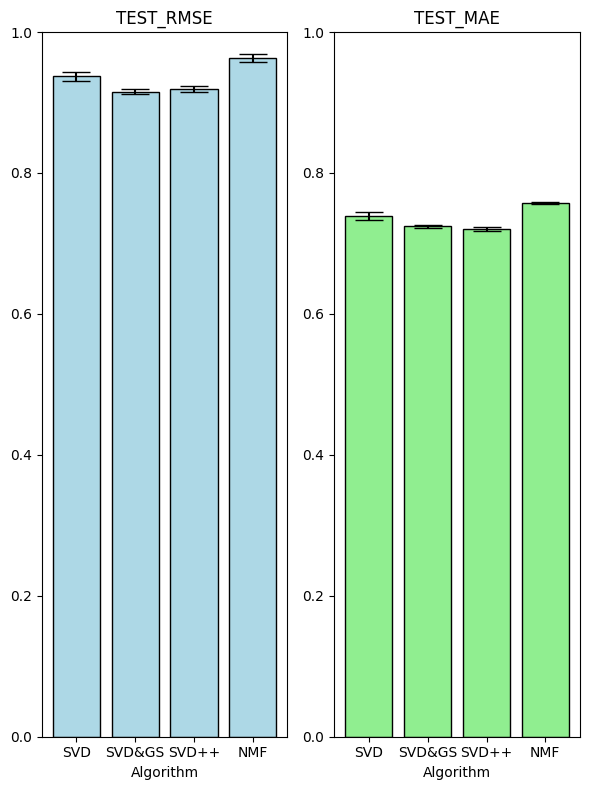

In [80]:
import matplotlib.pyplot as plt

algorithms = [i for i in comperate.index]
metrics = [i.upper() for i in comperate.columns]
test_rmse_mean = [dict['mean'] for dict in comperate['test_rmse']]
test_rmse_std = [dict['std'] for dict in comperate['test_rmse']]
test_mae_mean = [dict['mean'] for dict in comperate['test_mae']]
test_mae_std = [dict['std'] for dict in comperate['test_mae']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 8))

ax1.bar(algorithms, test_rmse_mean, yerr=test_rmse_std, capsize=10, color='lightblue', edgecolor='black')
ax1.set_title(metrics[0])
ax1.set_xlabel('Algorithm')
ax1.set_ylim(0, 1)

ax2.bar(algorithms, test_mae_mean, yerr=test_mae_std, capsize=10, color='lightgreen', edgecolor='black')
ax2.set_title(metrics[1])
ax2.set_xlabel('Algorithm')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()